In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

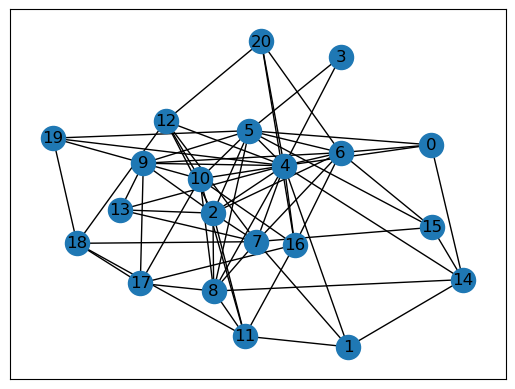

In [3]:
numV=21
G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)

In [4]:
from qiskit_algorithms.optimizers import SPSA

settings={}
settings["blocking"]=True
settings["maxiter"]=10
settings["allowed_increase"]=0
settings["second_order"]=True
settings["regularization"]=0.01
opt_method=SPSA(**settings)

In [5]:
#  Initialize QAOA object
alpha = 0.01     # value for CVaR (Conditional Value at Risk)
params={'G': G, 'alpha': alpha, 'optimizer' : opt_method}
qaoamc_cvar = QAOAMaxCut(params=params)
params={'G': G}
qaoamc = QAOAMaxCut(params=params)

min cost is precalculated

In [6]:
mincost=-25.23404480588015

In [7]:
# Evaluating the QAOA circuit with uniformly sampled angles for gamma and beta, just to see how sampling measurements from 
# the circuits roughly looks like.
qaoamc.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
qaoamc_cvar.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})


Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


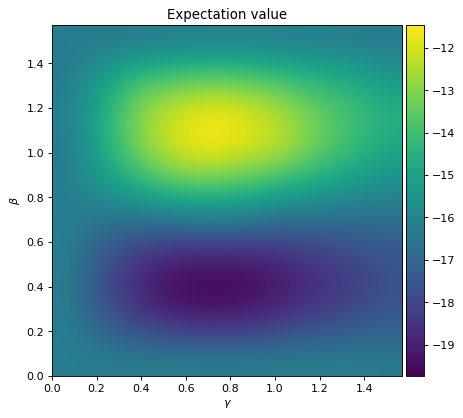

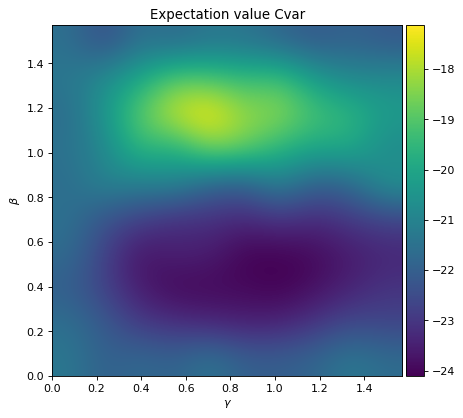

In [8]:
#  Visualize expected values for uniformly sampled gamma/beta pairs

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value Cvar')
im = ax.imshow(qaoamc_cvar.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)


In [9]:
maxdepth=5
for i in range(maxdepth):
    qaoamc.increase_depth()
    qaoamc_cvar.increase_depth()

cost(depth= 1 )= -19.81145532519197
cost(depth= 1 )= -24.125669147685272
cost(depth= 2 )= -21.431573915770528
cost(depth= 2 )= -24.753273301342354
cost(depth= 3 )= -22.162089504998896
cost(depth= 3 )= -25.15785004144065
cost(depth= 4 )= -22.443197836338754
cost(depth= 4 )= -25.234044805880153
cost(depth= 5 )= -22.94497799572837
cost(depth= 5 )= -25.234044805880153


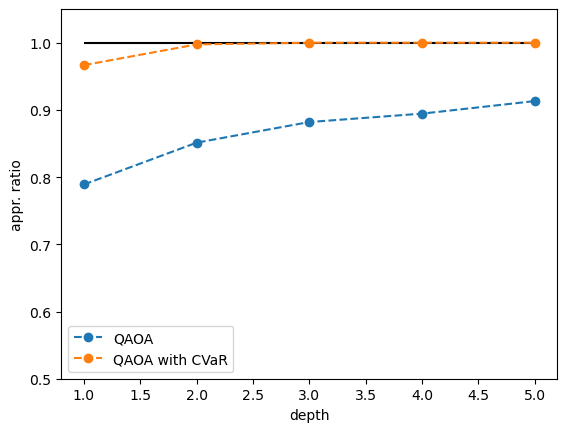

In [10]:
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc.costval.values()))/mincost,'o--', label='QAOA')
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc_cvar.costval.values()))/mincost,'o--', label='QAOA with CVaR')
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend()